In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.7
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [16]:
terror_data <- read.csv("~/Downloads/globalterror.csv")

In [8]:
head(terror)

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,⋯,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1.97000e+11,1970,7,2,,0,,58,Dominican Republic,2,⋯,,,,,PGIS,0,0,0,0,
1.97000e+11,1970,0,0,,0,,130,Mexico,1,⋯,,,,,PGIS,0,1,1,1,
1.97001e+11,1970,1,0,,0,,160,Philippines,5,⋯,,,,,PGIS,-9,-9,1,1,
1.97001e+11,1970,1,0,,0,,78,Greece,8,⋯,,,,,PGIS,-9,-9,1,1,
1.97001e+11,1970,1,0,,0,,101,Japan,4,⋯,,,,,PGIS,-9,-9,1,1,
1.97001e+11,1970,1,1,,0,,217,United States,1,⋯,"The Cairo Chief of Police, William Petersen, resigned as a result of the attack.","""Police Chief Quits,"" Washington Post, January 2, 1970.","""Cairo Police Chief Quits; Decries Local 'Militants',"" Afro-American, January 10, 1970.","Christopher Hewitt, ""Political Violence and Terrorism in Modern America: A Chronology,"" Praeger Security International, 2005.",Hewitt Project,-9,-9,0,-9,


In [17]:
terror <- terror_data %>% rename(year = iyear, month = imonth, day = iday, country_id = country, country = country_txt, region_id = region, region = region_txt)

In [11]:
colnames(terror)

[1] "eventid"            "iyear"              "imonth"            
  [4] "iday"               "approxdate"         "extended"          
  [7] "resolution"         "country"            "country_txt"       
 [10] "region"             "region_txt"         "provstate"         
 [13] "city"               "latitude"           "longitude"         
 [16] "specificity"        "vicinity"           "location"          
 [19] "summary"            "crit1"              "crit2"             
 [22] "crit3"              "doubtterr"          "alternative"       
 [25] "alternative_txt"    "multiple"           "success"           
 [28] "suicide"            "attacktype1"        "attacktype1_txt"   
 [31] "attacktype2"        "attacktype2_txt"    "attacktype3"       
 [34] "attacktype3_txt"    "targtype1"          "targtype1_txt"     
 [37] "targsubtype1"       "targsubtype1_txt"   "corp1"             
 [40] "target1"            "natlty1"            "natlty1_txt"       
 [43] "targtype2"          "targtype2_txt"      "targsubtype2"      
 [46] "targsubtype2_txt"   "corp2"              "target2"           
 [49] "natlty2"            "natlty2_txt"        "targtype3"         
 [52] "targtype3_txt"      "targsubtype3"       "targsubtype3_txt"  
 [55] "corp3"              "target3"            "natlty3"           
 [58] "natlty3_txt"        "gname"              "gsubname"          
 [61] "gname2"             "gsubname2"          "gname3"            
 [64] "gsubname3"          "motive"             "guncertain1"       
 [67] "guncertain2"        "guncertain3"        "individual"        
 [70] "nperps"             "nperpcap"           "claimed"           
 [73] "claimmode"          "claimmode_txt"      "claim2"            
 [76] "claimmode2"         "claimmode2_txt"     "claim3"            
 [79] "claimmode3"         "claimmode3_txt"     "compclaim"         
 [82] "weaptype1"          "weaptype1_txt"      "weapsubtype1"      
 [85] "weapsubtype1_txt"   "weaptype2"          "weaptype2_txt"     
 [88] "weapsubtype2"       "weapsubtype2_txt"   "weaptype3"         
 [91] "weaptype3_txt"      "weapsubtype3"       "weapsubtype3_txt"  
 [94] "weaptype4"          "weaptype4_txt"      "weapsubtype4"      
 [97] "weapsubtype4_txt"   "weapdetail"         "nkill"             
[100] "nkillus"            "nkillter"           "nwound"            
[103] "nwoundus"           "nwoundte"           "property"          
[106] "propextent"         "propextent_txt"     "propvalue"         
[109] "propcomment"        "ishostkid"          "nhostkid"          
[112] "nhostkidus"         "nhours"             "ndays"             
[115] "divert"             "kidhijcountry"      "ransom"            
[118] "ransomamt"          "ransomamtus"        "ransompaid"        
[121] "ransompaidus"       "ransomnote"         "hostkidoutcome"    
[124] "hostkidoutcome_txt" "nreleased"          "addnotes"          
[127] "scite1"             "scite2"             "scite3"            
[130] "dbsource"           "INT_LOG"            "INT_IDEO"          
[133] "INT_MISC"           "INT_ANY"            "related"

In [24]:
terror %>% filter(year==1993)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

eventid,year,month,day,approxdate,extended,resolution,country_id,country,region_id,⋯,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [25]:
str(terror)

'data.frame':	181691 obs. of  135 variables:
 $ eventid           : num  1.97e+11 1.97e+11 1.97e+11 1.97e+11 1.97e+11 ...
 $ year              : int  1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 ...
 $ month             : int  7 0 1 1 1 1 1 1 1 1 ...
 $ day               : int  2 0 0 0 0 1 2 2 2 3 ...
 $ approxdate        : Factor w/ 2245 levels "","01/04/2000",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ extended          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ resolution        : Factor w/ 1860 levels "","1/1/1978",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ country_id        : int  58 130 160 78 101 217 218 217 217 217 ...
 $ country           : Factor w/ 205 levels "Afghanistan",..: 48 117 141 69 91 190 191 190 190 190 ...
 $ region_id         : int  2 1 5 8 4 1 3 1 1 1 ...
 $ region            : Factor w/ 12 levels "Australasia & Oceania",..: 2 7 10 12 4 7 8 7 7 7 ...
 $ provstate         : Factor w/ 2856 levels "","(Region) of Republican Subordination (Province)",..: 1 784 2507 188 810 1016 1648 441 2766 27

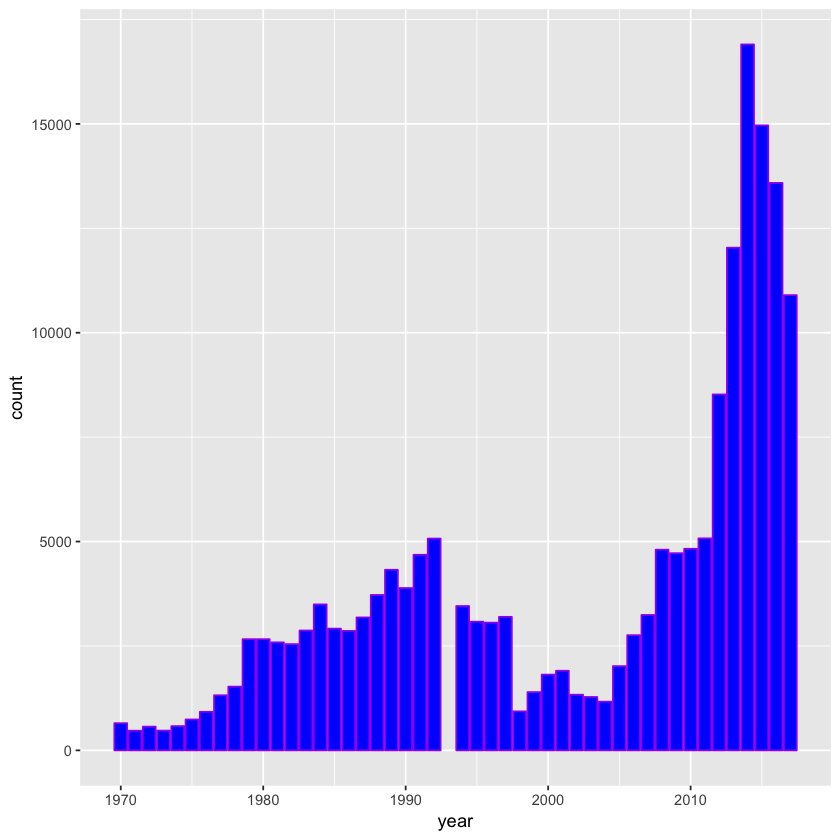

In [26]:
terror %>% group_by(year) %>% ggplot(aes(year)) + geom_bar(color="purple", fill="blue")